In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [26]:
dic = {'random':['individual_stats_beta.csv', 'mean_dist_stats_beta.csv', 'beta_logs.txt'], 
       'highstep':['individual_stats_inspect0.5.csv', 'mean_dist_stats_inspect0.5.csv', 'loop_inspectsat.txt'],
       'it1_1':['individual_stats_inspect01.csv', 'mean_dist_stats_inspect01.csv', 'inspect_0.1sun.txt'], 
       'it1_2':['individual_stats_inspect01_2.csv', 'mean_dist_stats_inspect01_2.csv', 'inspect_0.1_second.txt'],
       'it1_3':['individual_stats_01_3.csv', 'mean_dist_01_3.csv', 'inspect_.01_mon.txt'],
       'it1_time1':['idstat_time01.csv', 'mdstat_time01.csv', 'inspect_time_factor.txt' ],
       'it1_time2':['idstat_time02.csv', 'mdstat_time02.csv','inspect_time_factor02.txt' ],
       'it1_time3':['idstats_time03.csv', 'mdstats_time03.csv', 'inspect_time_factor03.txt'],
       'it2_time1':['idstats_2ndit_time01.csv', 'mdstats_2ndit_time01.csv', '2nd_iteration_time01.txt'],
       'it2_time2':['idstats_2ndit_time02.csv', 'mdstats_2ndit_time02.csv', '2nd_iteration_time02.txt'],
       'it2_time3':['idstats_2ndit_time03.csv', 'mdstats_2ndit_time03.csv', '2nd_iteration_time03.txt']
      }

In [27]:
def plot_population(filename):
    
    df = pd.read_csv(filename, index_col = 0)
    best_individual = df.max().max()
    print(best_individual)
    df['min'] = df.min()
    minima = []
    for row in df.iterrows():
        minima.append(np.min(row[1]))

    maxima = []
    for row in df.iterrows():
        maxima.append(np.max(row[1]))

    means = []
    for row in df.iterrows():
        means.append(np.mean(row[1]))

    
    plt.plot(minima, label="Minimum")
    plt.plot(maxima, label="Maximum")
    plt.plot(means, label = "Mean")
    plt.legend()
    plt.title("Population performance")
    plt.xlabel("Generations")
    plt.ylabel("Average Reward (10 replicates)")
    plt.show()
    
    return best_individual
    
def plot_mean(filename):
    
    ui = pd.read_csv(filename, index_col=0)
    plt.plot(ui.iloc[:, 1])
    print(ui.iloc[:,1].max())
    plt.title("Distribution mean performance")
    plt.xlabel("Generations")
    plt.ylabel("Average Reward (100 replicates)")
    plt.show()
    
    return ui.iloc[:,1].max()


In [28]:
# Parse file for best episode:
def get_max_score(filename):

    with open(filename) as f:
        rewardlines = []
        timesteplines = []
        for line in f:

            if "reward" in line and "timesteps" in line:
#                 print(line)
                line = line.strip()
                reward = line.split(' ')[1]
                timestep = line.split(' ')[3]
                rewardlines.append(float(reward))
                timesteplines.append(int(timestep))
        
        return np.max(rewardlines), np.max(timesteplines)
        




random
263.0


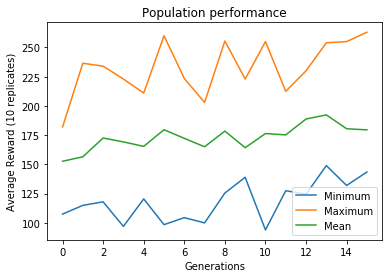

205.66666666666663


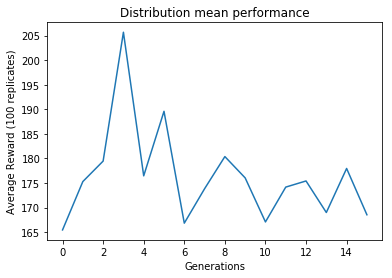

263.0
highstep
350.0


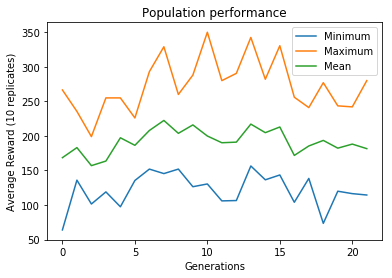

267.7083333333333


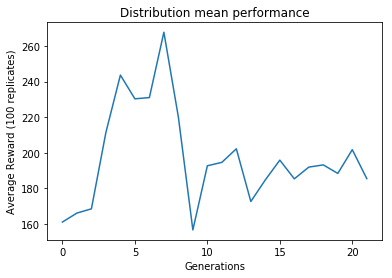

350.0
it1_1
443.0


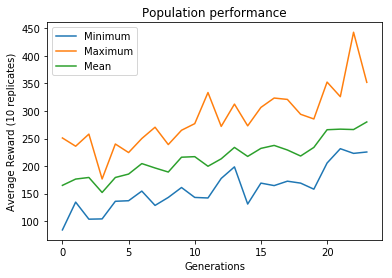

302.4583333333333


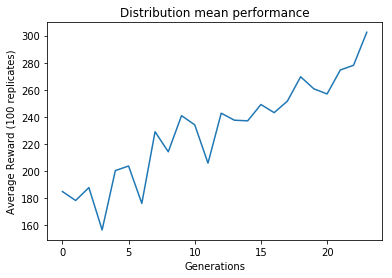

443.0
it1_2
367.5


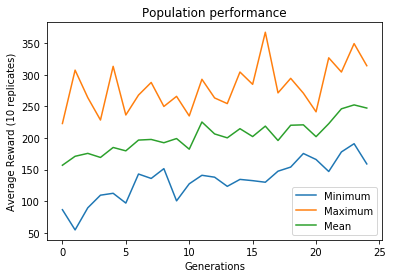

249.66666666666663


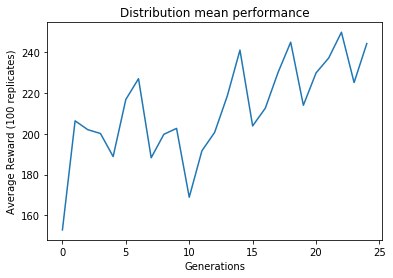

367.5
it1_3
390.0


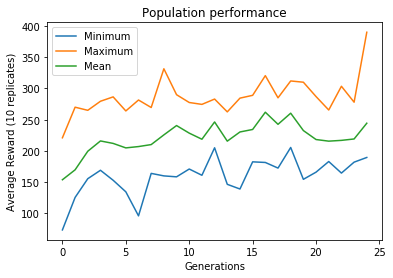

271.3333333333333


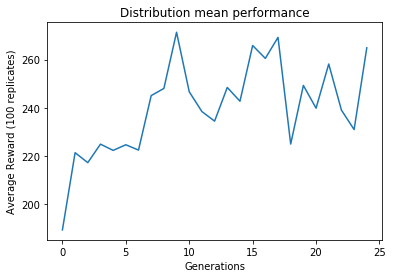

390.0
it1_time1
360.5


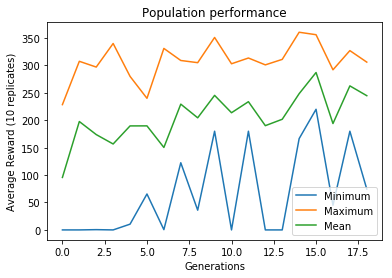

360.08333333333326


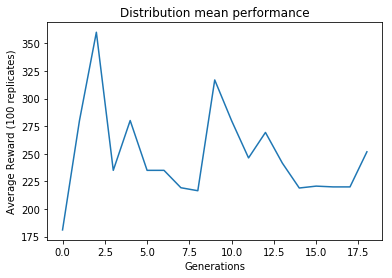

360.5
it1_time2
544.0


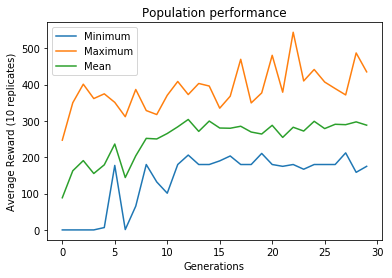

411.20833333333326


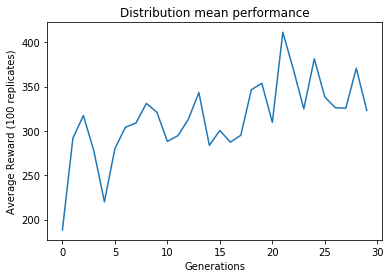

544.0
it1_time3
398.5


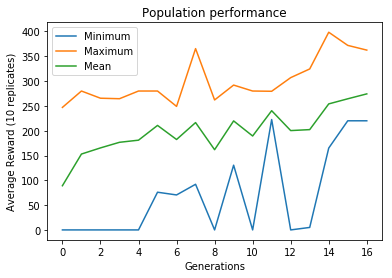

302.875


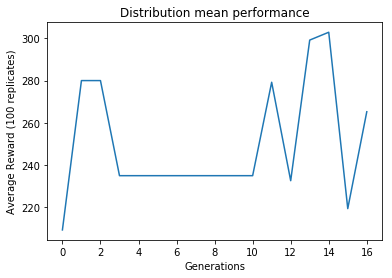

398.5
it2_time1
427.5


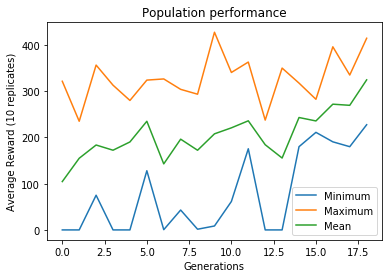

325.4583333333333


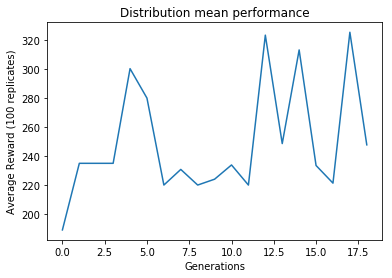

427.5
it2_time2
513.0


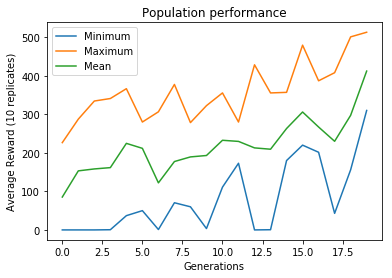

412.16666666666674


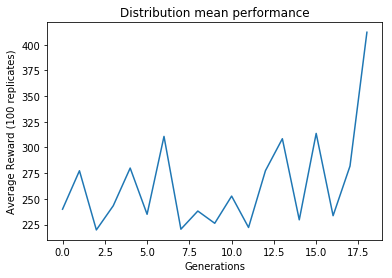

513.0
it2_time3
472.5


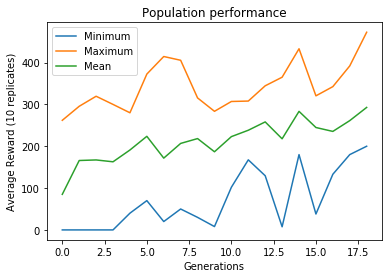

350.08333333333326


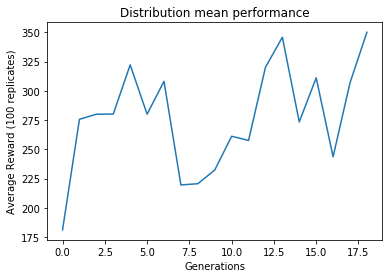

472.5
                       DeepQN  random  highstep  it1_1  it1_2  it1_3  \
Best distribution mean    N/A     205       267    302    249    271   
Best individual           581     263       350    443    367    390   
Best single episode      1075     765       950    905    945    900   
Longest survival          N/A    1916      2195   2075   2100   2034   

                        it1_time1  it1_time2  it1_time3  it2_time1  it2_time2  \
Best distribution mean        360        411        302        325        412   
Best individual               360        544        398        427        513   
Best single episode          1040        955        985       1060       1060   
Longest survival             2474       2190       2472       2119       2408   

                        it2_time3  
Best distribution mean        350  
Best individual               472  
Best single episode          1060  
Longest survival             2119  


In [29]:
results = pd.DataFrame()
for e, experiment in enumerate(dic):

    print(experiment)
    max_ind = plot_population(dic[experiment][0])
    max_dist = plot_mean(dic[experiment][1])
    max_episode, max_timesteps = get_max_score(dic[experiment][2])
    print(max_ind)
    results_col = [int(np.floor(max_dist)), int(np.floor(max_ind)), int(max_episode), int(max_timesteps)]
    results['DeepQN'] = ['N/A', 581, 1075, 'N/A']
    results[experiment] = results_col
    
    results.index = ['Best distribution mean', 'Best individual', 'Best single episode', 'Longest survival']
    
print(results)
    

In [30]:
print(results.to_latex())

\begin{tabular}{llrrrrrrrrrrr}
\toprule
{} & DeepQN &  random &  highstep &  it1\_1 &  it1\_2 &  it1\_3 &  it1\_time1 &  it1\_time2 &  it1\_time3 &  it2\_time1 &  it2\_time2 &  it2\_time3 \\
\midrule
Best distribution mean &    N/A &     205 &       267 &    302 &    249 &    271 &        360 &        411 &        302 &        325 &        412 &        350 \\
Best individual        &    581 &     263 &       350 &    443 &    367 &    390 &        360 &        544 &        398 &        427 &        513 &        472 \\
Best single episode    &   1075 &     765 &       950 &    905 &    945 &    900 &       1040 &        955 &        985 &       1060 &       1060 &       1060 \\
Longest survival       &    N/A &    1916 &      2195 &   2075 &   2100 &   2034 &       2474 &       2190 &       2472 &       2119 &       2408 &       2119 \\
\bottomrule
\end{tabular}

